<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; text-align: justify">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">Estudio de los Factores Contribuyentes a la Obesidad</h1>
 <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Trabajo Final Análisis Inteligente de Datos</p>
    
 <p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Alumno: Patricio Garcia</p>


</div>


  

<div style="display: flex; align-items: flex-start; ">
    <div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1); flex: 1; margin-right: 20px;">
        <h2 style="font-family: 'Verdana'; color: #3A405A; text-align: center;">🔍 Descripción de dataset</h2>
        <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify">
            El dataset presenta información sobre parámetros para la estimación de los niveles de obesidad en México, Perú y Colombia, basado en los hábitos alimenticios y niveles de actividad física. El 77% de los datos fue creado artificialmente usando la herramienta Weka y el filtro SMOTE, mientras que el restante 23% fue recolectado desde un sitio web. En este trabajo sólo se usaron registros reales debido a que los creados artificialmente presentan variables categóricas con valores intermedios (por ejemplo, frecuencia diaria de actividad física = 2,74).
        </p>
        <p style="font-size: 10px; font-family: 'Verdana'; color: #3A405A;"></p>
    </div>
    <img src="https://www.commonwealthfund.org/sites/default/files/styles/hero_image_desktop/public/TheDose_Ep99_FatimaStandord_Obesity-as-a-Disease_3x2.png?h=4362216e&itok=yznZcXSy" width="420px" style="margin-left: 20px;">
</div>


<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px;">
    <h2 style="font-family: 'Verdana'; color: #3A405A; text-align: center;">🔍Información sobre los datos </h2>


<ul>
  <li><strong>Fuente</strong>: <a href="https://doi.org/10.1016/j.dib.2019.104344">https://doi.org/10.1016/j.dib.2019.104344</a></li>
  <li><strong>Variables</strong>:</li>
  <ul>
    <li>Gender: género biológico - Categórica Nominal</li>
    <li>Age: edad (años) - Cuantitativa continua</li>
    <li>Height: altura (metros) - Cuantitativa continua</li>
    <li>Weight: peso (kg) - Cuantitativa continua</li>
    <li>Family_history_with_overweight: antecedentes de obesidad familiares (Si/No) - Categórica nominal</li>
    <li>FAVC: consumo frecuente de comidas calóricas (Si/No) - Categórica nominal</li>
    <li>FCVC: frecuencia de consumo de vegetales (1:Nunca/2:A veces/3:Siempre) - Categórica ordinal</li>
    <li>NCP: número de comidas principales (1:Entre 1 y 2 /2:3 /3:Más de 4) - Categórica ordinal</li>
    <li>CAEC: consumo de comida entre comidas principales (No/A veces/Frecuentemente/Siempre) - Categórica ordinal</li>
    <li>SMOKE: condición de fumador (Si/No) - Categórica nominal</li>
    <li>CH2O: litros diarios de agua (1:Menos de 1/2:Entre 1 y 2 /3:Más de 2) - Categórica ordinal</li>
    <li>SCC: control de calorías diarias consumidas (Si/No) - Categórica nominal</li>
    <li>FAF: frecuencia de actividad física (0:No realiza/ 1:Entre 1 y 2/ 2:Entre 3 y 4/ 3:Entre 4 y 5) - Cuantitativa discreta</li>
    <li>TUE: horas de uso de dispositivos electrónicos (0:0 a 2 / 1:Entre 3 y 5/ 2:Más de 5) - Categórica ordinal</li>
    <li>CALC: consumo de alcohol (No/A veces/Frecuentemente/Siempre) - Categórica ordinal</li>
    <li>MTRANS: medio de transporte usado - Categórica nominal</li>
    <li>NObeyesdad: condición de peso - Categórica ordinal</li>
  </ul>
</ul>


<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">📊 Carga y limpieza de datos</h1>
</div>
<br>



In [13]:
#Carga librerias
import os
import sys
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import scipy.cluster.hierarchy as shc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [14]:
#Carga datos. El data set es un archivo arff
raw_data = loadarff('C:/Users/usuario/Desktop/Data Science/Master/6. Análisis inteligente de datos/ObesityDataSet_raw_and_data_sinthetic.arff')
data = pd.DataFrame(raw_data[0])
data = data.iloc[0:497] #Guarda solo registros reales

In [15]:
#Itera sobre columnas dtypes. Si objeto es de tipo bytes lo convierte a string
for col in data.select_dtypes([np.object_]):
    data[col] = data[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [16]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">El dataset ya fue previamente limpiado por lo que no hay valores faltantes.
</p>

In [18]:
data['IMC'] = data['Weight'] / data['Height'] ** 2 #Creamos variable IMC (indice de masa corporal)

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">📊 Análisis exploratorio</h1>
    
<p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        Se lleva a cabo un análisis exploratorio breve para investigar posibles relaciones entre variables y comprender mejor los datos.
</p>
</div>

In [20]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,23.152918,1.686640,69.619316,2.325956,2.657948,1.923541,1.162978,0.659960,24.325245
std,6.726869,0.097587,16.994526,0.590918,0.920040,0.679621,1.025677,0.723362,4.769901
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.291588
25%,19.000000,1.620000,58.000000,2.000000,3.000000,1.000000,0.000000,0.000000,21.007668
50%,21.000000,1.680000,67.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.711845
75%,24.000000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000,26.672763
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,49.472390


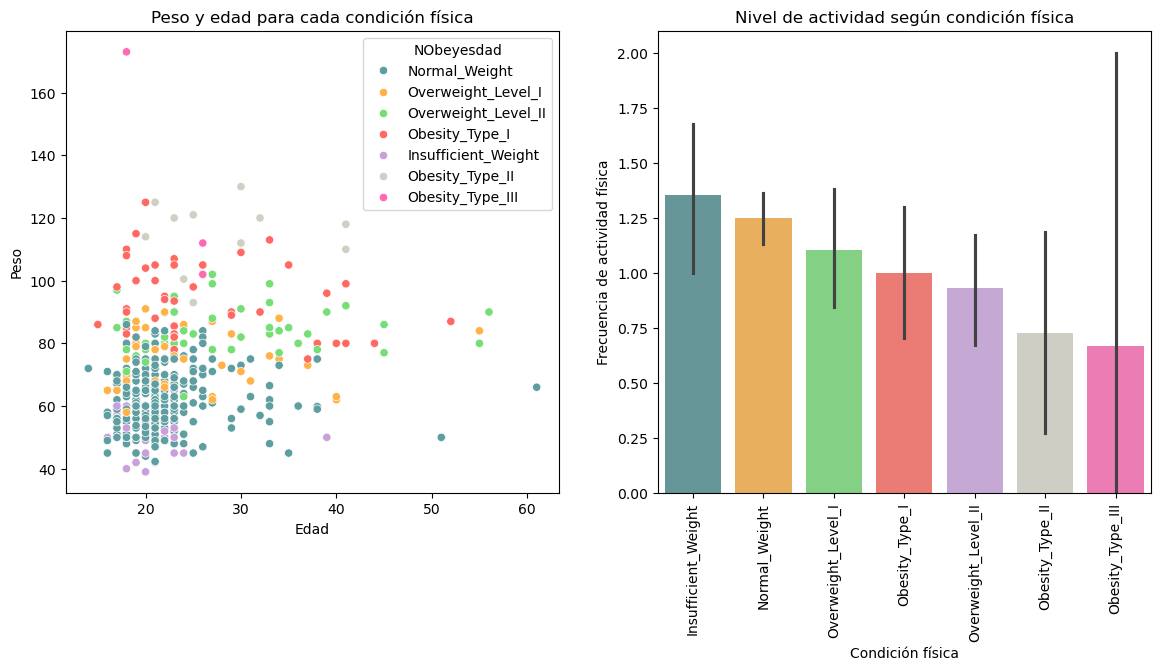

In [21]:
palette = ["#5f9ea0", "#ffb347", "#77dd77", "#ff6961", "#c9a0dc", "#cfcfc4", "#ff69b4"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.scatterplot(ax=axes[0], x='Age', y='Weight', hue='NObeyesdad', data=data, palette=palette)
axes[0].set_title('Peso y edad para cada condición física')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Peso')

order = data.groupby('NObeyesdad')['FAF'].mean().sort_values(ascending=False).index #Orden de los datos 
sns.barplot(ax=axes[1], data=data, x='NObeyesdad', y='FAF', order=order, palette=palette)
axes[1].set_title('Nivel de actividad según condición física')
axes[1].set_ylabel('Frecuencia de actividad física')
axes[1].set_xlabel('Condición física')
axes[1].tick_params(axis='x', rotation=90)

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       En el gráfico de la izquierda, se observa que la mayor proporción de personas con obesidad del tipo 3 tiene menos de 30 años, en su mayoría entre 25 y 20 años, mientras que la obesidad tipo 1 y 2 abarcan un rango de edad mayor, entre 20 y 40 años. Las personas con sobrepeso abarcan casi la totalidad del rango etario. Por otro lado, las observaciones con peso insuficiente se acumulan alrededor de los 20 y 25 años. Adicionalmente, se ve lo que podría ser un outlier por encima de 160 kilogramos con obesidad tipo 3.<br>
En el gráfico de la derecha, se ve una tendencia a mayor actividad física en condiciones de peso insuficientes y normales. La frecuencia de actividad disminuye hacia condiciones de sobrepeso y obesidad. No es menor resaltar que los datos de las personas con obesidad tipo 3 presentan alta variabilidad.
    </p>
</div>






In [23]:
#Genera dataframe con datos sobre condición física y cantidad de comida entre comidas principales(CAEC)
data_grafico1 = data[['NObeyesdad','CAEC']].value_counts() #Cuenta observaciones
cuenta_condicion = data['NObeyesdad'].value_counts() #Cuenta total de cada condición física
data_grafico1 = data_grafico1.reset_index() #Restablece indice del dataframe
data_grafico1 = data_grafico1.merge(cuenta_condicion, on='NObeyesdad') #Combina df para hacer cuentas porcentuales
data_grafico1.columns = ['NObeyesdad','CAEC', 'Cuenta', 'Total NObeyesdad'] #Renombra columnas
data_grafico1['%CAEC según condición'] = data_grafico1['Cuenta'] / data_grafico1['Total NObeyesdad'] * 100

#Genera dataframe con datos sobre condición física y cantidad de comida entre comidas principales(CAEC)
data_grafico2 = data[['NObeyesdad','family_history_with_overweight']].value_counts() #Cuenta observaciones
data_grafico2 = data_grafico2.reset_index() #Restablece indice del dataframe
data_grafico2 = data_grafico2.merge(cuenta_condicion, on='NObeyesdad') #Combina df para hacer cuentas porcentuales
data_grafico2.columns = ['NObeyesdad','family_history_with_overweight', 'Cuenta', 'Total NObeyesdad'] #Renombra columnas
data_grafico2['%antecedentes según condición'] = data_grafico2['Cuenta'] / data_grafico2['Total NObeyesdad'] * 100

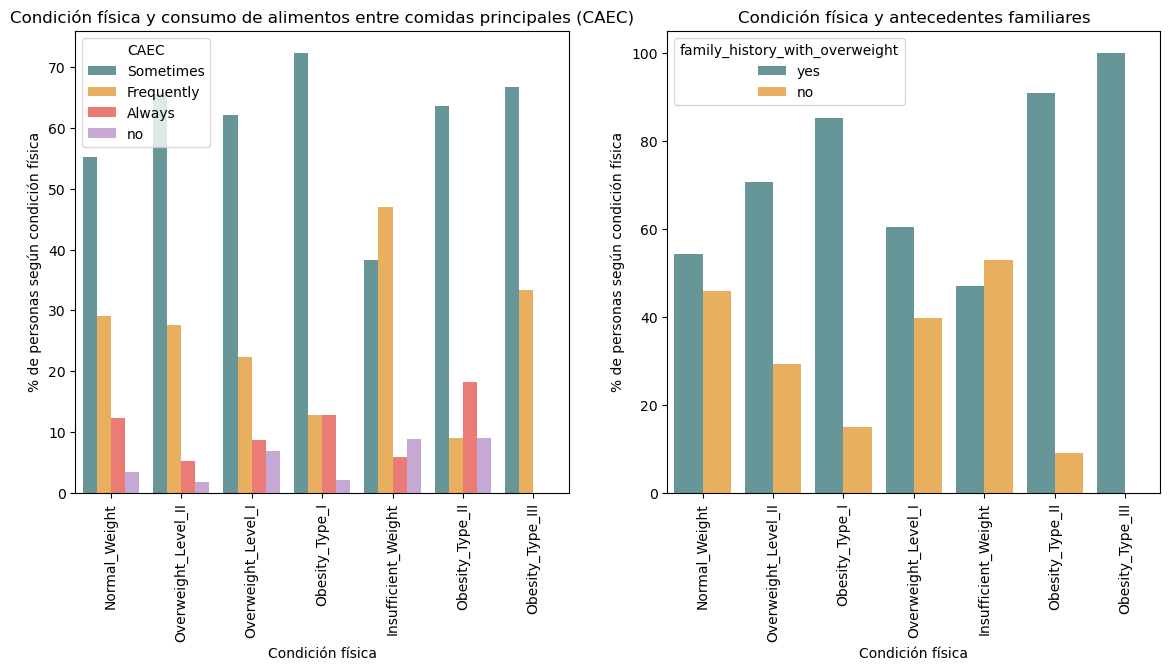

In [24]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

palette_4 = ["#5f9ea0", "#ffb347", "#ff6961", "#c9a0dc"]
palette_2 = ["#5f9ea0", "#ffb347"]

sns.barplot(ax=axes[0], x=data_grafico1['NObeyesdad'], 
            y=data_grafico1['%CAEC según condición'], hue=data_grafico1['CAEC'], palette=palette_4)
axes[0].set_title('Condición física y consumo de alimentos entre comidas principales (CAEC)')
axes[0].set_xlabel('Condición física')
axes[0].set_ylabel('% de personas según condición física')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], x=data_grafico2['NObeyesdad'], y=data_grafico2['%antecedentes según condición'],
            hue=data_grafico2['family_history_with_overweight'], palette=palette_2)
axes[1].set_title('Condición física y antecedentes familiares')
axes[1].set_xlabel('Condición física')
axes[1].set_ylabel('% de personas según condición física')
axes[1].tick_params(axis='x', rotation=90)

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       En el gráfico izquierdo se evidencia que en los grupos de peso normal y con sobrepeso, hay una mayor cantidad de personas que realizan ingesta de alimentos entre comidas principales de manera frecuente, en comparación con los grupos que tienen obesidad del tipo 1 y 2. Los grupos con obesidad parecen realizar una ingesta ocasional. En el grupo con peso insuficiente, se observa un porcentaje mayor de personas que consume alimentos entre comida de manera frecuente. <br>
En el gráfico derecho, se aprecia que las personas con obesidad y sobrepeso tienden a tener antecedentes de familiares con sobrepeso. El grupo de personas con peso normal presentan una relación más balanceada entre antecendentes familiares de obesidad. Finalmente, las personas con peso insuficiente tiene una mayor proporción de familiares sin antecedentes de obesidad.
    </p>
</div>





<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">📊 Clusterización de variables cuantitativas</h1>
    
<p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        Con el fin de generar perfiles de personas para identificar patrones en los datos, se implementaron diferentes algoritmos de clasificación no supervisada.
</p>
</div>



## Normalización de datos
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Para la correcta aplicación de los algoritmos, se normalizaron los datos para que tengan media 0 y desvío estándar 1.
</p>

In [28]:
cuantitativas = data[['Age','Height', 'Weight' ]] #Selecciona variables cuantitativas

scaler = StandardScaler() #Instacia scaler
cuant_escaladas = scaler.fit_transform(cuantitativas) #Escala variables

## Clustering no jerárquico: K-means
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> K-means particiona datos en k grupos, minimizando la variación dentro de cada grupo y maximizando la diferencia entre grupos. Cada punto se asigna al grupo con el centroide más cercano.
</p>

### Definición del número de clusters
***Elbow Plot***

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">La inercia (suma de errores cuadráticos dentro del cluster) mide la compacidad de los clusters. Para determinar el número óptimo de clusters en un algoritmo de clasificación, se puede realizar un gráfico de codo ("elbow plot"). En este gráfico, se elige el punto donde la pendiente de la curva deja de ser pronunciada, formando un "codo". Este punto representa la menor inercia posible con el menor número de clusters necesario. 
</p>

***Índice Silhouette***

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Por otro lado, el índice Silhouette proporciona información sobre la relación entre las distancias intra e intercluster. Un índice Silhouette cercano a uno indica una distancia intracluster pequeña y una distancia intercluster grande, lo que sugiere una buena separación entre los clusters.
</p>

Text(0.5, 1.0, 'Indice Silhouette')

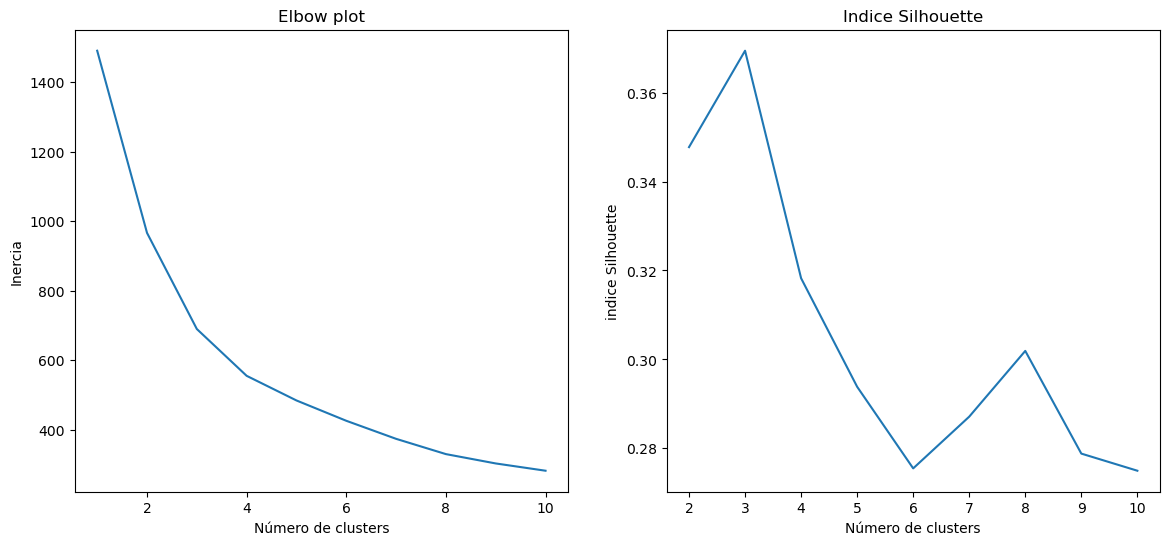

In [31]:
inercias = [] #Lista para almacenar inercias (Within-Cluster Sum of Squares, WCSS)
k = range(1,11) #Número de clusters a probar

for i in k: #Itera sobre número de clusters
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=10) #Instancia algoritmo KMeans cambiando k en cada iteración
    kmeans.fit(cuant_escaladas) #ajusta a datos
    inercias.append(kmeans.inertia_) #Calcula inercia y guarda en lista
    
indice_sil = []
j = range(2,11) #Número de clusters a probar

for i in j:
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=10)
    kmeans.fit(cuant_escaladas)
    indice_sil.append(silhouette_score(cuant_escaladas, kmeans.labels_))
    
fig, axes = plt.subplots(1,2, figsize=(14,6))    
    
axes[0].plot( k, inercias)
axes[0].set_xlabel('Número de clusters')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Elbow plot')

axes[1].plot( j, indice_sil)
axes[1].set_xlabel('Número de clusters')
axes[1].set_ylabel('indice Silhouette')
axes[1].set_title('Indice Silhouette')   

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">El elbow plot muestra un número apropiado de clusters de entre 2 y 4 mientras que el indice Silhouette es máximo en 3  seguido por 2 clusters.
</p>

### Implementación de K-means


In [34]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=1) #Instancia modelo
kmeans.fit(cuant_escaladas) #Ajusta modelo a datos
centers = kmeans.cluster_centers_ #Guarda valor de centros de cada cluster 
centers_deescalados = scaler.inverse_transform(centers)
centers_df = pd.DataFrame(centers_deescalados, columns=cuantitativas.columns) #Crea df con centros de clusters
centers_df = centers_df.sort_values(by='Weight') #Ordena df de menor a mayor peso

In [35]:
centers_df

,Age,Height,Weight
0,21.708333,1.627153,59.618403
1,25.143541,1.768612,83.400478


In [36]:
kmeans.labels_ = pd.Series(kmeans.labels_) #Transforma array a serie para mapear
kmeans_mapping = {0:'Peso saludable', 1:'Peso no saludable'} #Diccionario de mapeo
kmeans.labels = kmeans.labels_.map(kmeans_mapping) #Mapea datos para cambiar labels númericos 

Text(0.5, 1.0, 'IMC por edad para cada cluster generado por K-means')

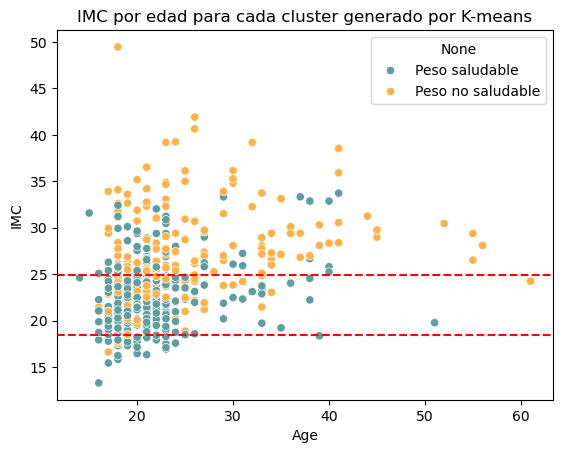

In [37]:
sns.scatterplot(x='Age', y='IMC', data=data, hue=kmeans.labels, palette=palette_2) 
plt.axhline(18.5, color='red', linestyle='--', label='Límite inferior IMC saludable')
plt.axhline(24.9, color='red', linestyle='--', label='Límite inferior IMC saludable')
plt.title('IMC por edad para cada cluster generado por K-means')

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       Se seleccionaron dos clusters debido a que se genera una mejor segmentación entre IMC saludable y no saludable en comparación con tres clusters. Al estudiar la distribución de los clusters en una gráfica donde se muestra el IMC en función de la edad, se puede apreciar una mayor cantidad de datos del perfil 'Peso saludable' dentro del rango de IMC recomendado. <br>
La distancia elegida fue Euclidiana ya que, a pesar de ser más sensible a outliers, dio mejor compacidad de clusters que la distancia Manhattan (utilizando K-Medoids, no mostrado).
A pesar del uso de otros números de clusters y distancias, no se logró agrupar las observaciones por debajo del IMC recomendado en un cluster aislado.
    </p>
</div>

## Clustering jerárquico: Ward
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">El algoritmo de Ward es un método de agrupamiento jerárquico que minimiza la varianza dentro de cada grupo.
</p>


### Jerarquia entre clusters: dendrograma

Text(0.5, 1.0, 'Dendrograma de variables cuantitativas')

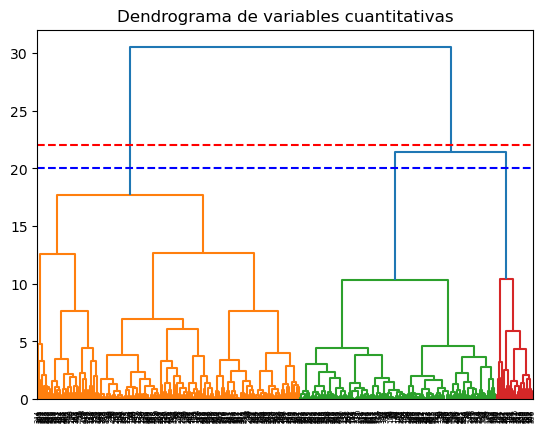

In [41]:
dend = shc.dendrogram(shc.linkage(cuant_escaladas, method='ward')) #Dendrograma de agrupamiento de puntos por ward
plt.axhline(22, color='red', linestyle='--')
plt.axhline(20, color='blue', linestyle='--')
plt.title('Dendrograma de variables cuantitativas')

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Se realizó un dendrograma para estudiar la jerarquia entre clusters al utilizar el método de Ward. Las lineas roja y azul representan una clusterización de 2 y 3 clusters respectivamente. 
</p>

### Implementación de algoritmo de Ward

In [44]:
ward = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward') #Instancia algoritmo ward
ward_labels = ward.fit_predict(cuant_escaladas) #Ajusta y predice datos

In [45]:
etiquetadas = pd.concat([pd.DataFrame(cuantitativas), pd.DataFrame(ward_labels)], axis=1) #concatena variable con label
etiquetadas = etiquetadas.rename(columns={0:'Label'}) #renombra columna label
etiquetadas.groupby('Label').mean().sort_values(by='Weight') #Agrupa por label, calcula promedio y ordena por peso

,Age,Height,Weight
Label,,,
0,22.918803,1.611923,58.073504
1,23.361217,1.753118,79.892015


In [46]:
ward_labels = pd.Series(ward_labels) #Transforma array a serie para mapear
ward_mapping = {0:'Peso saludable', 1:'Peso no saludable'} #Diccionario de mapeo
ward_labels = ward_labels.map(ward_mapping) #Mapea datos para cambiar labels númericos 

Text(0.5, 1.0, 'IMC por edad para cada cluster generado por Ward')

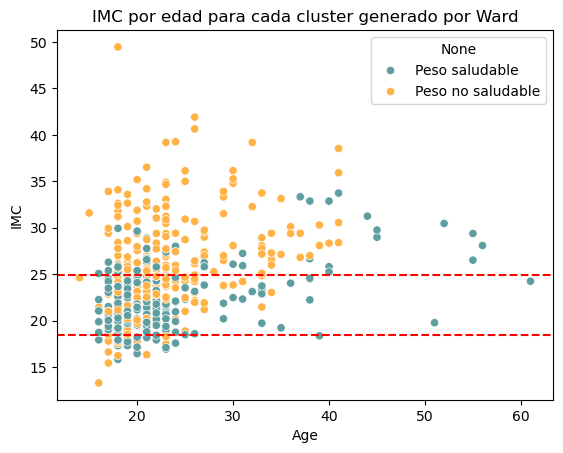

In [47]:
sns.scatterplot(x='Age', y='IMC', data=data, hue=ward_labels, palette=palette_2)

plt.axhline(18.5, color='red', linestyle='--', label='Límite inferior IMC saludable')
plt.axhline(24.9, color='red', linestyle='--', label='Límite inferior IMC saludable')
plt.title('IMC por edad para cada cluster generado por Ward')

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
Se aprecia una clusterización similar a la lograda con K-means, con algunos datos del cluster 'no saludable' en el rango de IMC saludables. Por otro lado, al analizar los valores por debajo del IMC recomendado, se evidencia que algoritmo de Ward logró una mejor asignación de estas observaciones al perfil 'no saludable'.
</p>
<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
<table style="width: 100%; border-collapse: collapse; margin-top: 20px;">
<thead>
<tr>
<th style="border: 1px solid #ddd; padding: 8px;">Label</th>
<th style="border: 1px solid #ddd; padding: 8px;">Algorithm</th>
<th style="border: 1px solid #ddd; padding: 8px;">Age</th>
<th style="border: 1px solid #ddd; padding: 8px;">Height</th>
<th style="border: 1px solid #ddd; padding: 8px;">Weight</th>
</tr>
</thead>
<tbody>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">Peso saludable</td>
<td style="border: 1px solid #ddd; padding: 8px;">K-means</td>
<td style="border: 1px solid #ddd; padding: 8px;">21.70</td>
<td style="border: 1px solid #ddd; padding: 8px;">1.63</td>
<td style="border: 1px solid #ddd; padding: 8px;">59.62</td>
</tr>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">Peso no saludable</td>
<td style="border: 1px solid #ddd; padding: 8px;">K-means</td>
<td style="border: 1px solid #ddd; padding: 8px;">25.14</td>
<td style="border: 1px solid #ddd; padding: 8px;">1.77</td>
<td style="border: 1px solid #ddd; padding: 8px;">83.40</td>
</tr>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">Peso saludable</td>
<td style="border: 1px solid #ddd; padding: 8px;">Ward</td>
<td style="border: 1px solid #ddd; padding: 8px;">22.91</td>
<td style="border: 1px solid #ddd; padding: 8px;">1.61</td>
<td style="border: 1px solid #ddd; padding: 8px;">58.07</td>
</tr>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">Peso no saludable</td>
<td style="border: 1px solid #ddd; padding: 8px;">Ward</td>
<td style="border: 1px solid #ddd; padding: 8px;">23.36</td>
<td style="border: 1px solid #ddd; padding: 8px;">1.75</td>
<td style="border: 1px solid #ddd; padding: 8px;">79.89</td>
</tr>
</tbody>
</table>
</p>
</div>
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
El algoritmo de Ward generó un perfil no saludable con peso y edad más bajo. Esto podria deberse a la inclusión en este grupo de las personas con peso por debajo del normal, que son mayoritariamente jovenes.
</p>
</div>


<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">📊 Clasificación supervisada</h1>
    
<p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        En este inciso, se buscó generar modelos predictivos de la condición de un paciente en base a sus hábitos. 
</p>
</div>

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">En primer lugar se dicotomiza la variable NObeyesdad (condición física) en personas con peso saludable y no saludable.
</p>

In [51]:
mapping = {'Normal_Weight': 'Healthy_Weight',              #Define diccionario con mapeo
           'Overweight_Level_I': 'Unhealthy_Weight',
           'Overweight_Level_II': 'Unhealthy_Weight',
           'Obesity_Type_I': 'Unhealthy_Weight',
           'Insufficient_Weight': 'Unhealthy_Weight',
           'Obesity_Type_II': 'Unhealthy_Weight', 
           'Obesity_Type_III': 'Unhealthy_Weight'
          }

data_dicot = data.copy() #copia dataset original

data_dicot['NObeyesdad'] = data_dicot['NObeyesdad'].map(mapping) #Mapea variable de condición para dicotomizar


<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Se separa en variable target y predictoras.
</p>

In [53]:
x = data_dicot.drop(columns='NObeyesdad') #Define variable objetivo
y = data_dicot['NObeyesdad'] #Define predictoras


<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Se transforman las variables categóricas a numéricas para entrenar los modelos.
</p>

In [55]:
categoricas = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

x = pd.get_dummies(x, columns=categoricas)


<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">Se divide dataset en conjunto de entrenamiento y prueba.
</p>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [61]:
import prince

# Suponiendo que 'x' es tu DataFrame con variables cualitativas
mca = prince.MCA(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=False
)

# Ajustar el modelo a los datos
mca = mca.fit(x)

# Obtener el resumen de los valores propios
eigenvalues_summary = mca.eigenvalues_summary

print(eigenvalues_summary)




          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.015        10.22%                     10.22%
1              0.012         7.86%                     18.07%
2              0.011         7.51%                     25.58%
3              0.009         6.30%                     31.88%
4              0.009         6.17%                     38.05%
5              0.009         5.91%                     43.96%
6              0.008         5.43%                     49.39%
7              0.008         5.32%                     54.71%
8              0.008         5.09%                     59.80%
9              0.007         4.94%                     64.74%


## Regresión logística

In [63]:
reg = LogisticRegression() #Instancia regresión logística
reg.fit(x_train, y_train) #Ajusta a datos de entrenamiento

y_model_reg = reg.predict(x_train) #Predice sobre datos de entrenamiento
y_pred_reg = reg.predict(x_test) #Predice sobre datos de pruba

print('Desempeño de modelo sobre datos de entrenamiento')
print(classification_report(y_train, y_model_reg))
print('Desempeño de modelo sobre datos de prueba')
print(classification_report(y_test, y_pred_reg))

Desempeño de modelo sobre datos de entrenamiento
                  precision    recall  f1-score   support

  Healthy_Weight       0.84      0.94      0.89       227
Unhealthy_Weight       0.90      0.76      0.83       170

        accuracy                           0.86       397
       macro avg       0.87      0.85      0.86       397
    weighted avg       0.87      0.86      0.86       397

Desempeño de modelo sobre datos de prueba
                  precision    recall  f1-score   support

  Healthy_Weight       0.92      0.95      0.93        59
Unhealthy_Weight       0.92      0.88      0.90        41

        accuracy                           0.92       100
       macro avg       0.92      0.91      0.92       100
    weighted avg       0.92      0.92      0.92       100



<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       El modelo tiene un buen desempeño sobre los datos de prueba. La precisión (proporción de predicciones positivas correctas) del modelo es alta para ambas categorías. Por otro lado, el recall (proporción de positivos reales correctamente identificados) es alto, aunque podría haber una mayor cantidad de falsos negativos en la categoría de peso no saludable en comparación con la de peso saludable. En general, el modelo muestra una alta precisión y una buena capacidad de generalización a los datos de prueba.
    </p>
</div>

## Máquina de soporte vectorial (SVM)
Un modelo de Máquinas de Soporte Vectorial (SVM) busca encontrar el hiperplano óptimo que maximiza la separación entre las clases en un conjunto de datos, utilizando solo los puntos más cercanos a ese hiperplano (vectores de soporte). 

In [72]:
svm = SVC(kernel='linear', C=1.0, random_state=42) #Instancia modelo svm
svm.fit(x_train, y_train) #Ajusta a datos de entrenamiento

y_model_svm = svm.predict(x_train) #Predice sobre datos de entrenamiento
y_pred_svm = svm.predict(x_test) #Predice sobre datos de prueba

print('Desempeño del modelo SVM sobre datos de entrenamiento')
print(classification_report(y_train, y_model_svm))
print('Desempeño del modelo SVM sobre datos de prueba')
print(classification_report(y_test, y_pred_svm))


Desempeño del modelo SVM sobre datos de entrenamiento
                  precision    recall  f1-score   support

  Healthy_Weight       0.85      0.98      0.91       227
Unhealthy_Weight       0.97      0.76      0.86       170

        accuracy                           0.89       397
       macro avg       0.91      0.87      0.88       397
    weighted avg       0.90      0.89      0.89       397

Desempeño del modelo SVM sobre datos de prueba
                  precision    recall  f1-score   support

  Healthy_Weight       0.92      0.98      0.95        59
Unhealthy_Weight       0.97      0.88      0.92        41

        accuracy                           0.94       100
       macro avg       0.95      0.93      0.94       100
    weighted avg       0.94      0.94      0.94       100




<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       Al aplicar un modelo de SVM, se obtuvieron mejores resultados en la clasificación de personas con peso saludable y no saludable en comparación con el modelo anterior. El modelo mostró una alta precisión y recall en ambos conjuntos de datos, de entrenamiento y de prueba.<br>
En los datos de entrenamiento, el modelo alcanzó una precisión muy alta, lo que sugiere que se ajustó muy bien a los datos. En los datos de prueba, se observa una mejora en la precisión y f1-score en la categoría de peso no saludable en comparación con el modelo de regresión logística. Los valores del parámetro c que penaliza los errores de clasificación fueron probados empiricamente, obteniendo rendimientos máximos del modelo entre 0.8 y 1. Se descarta un posible sobreajuste debido a que el modelo tiene buen rendimiento tanto en datos de entrenamiento como de prueba.
    </p>
</div>

<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">📊 Estudio de la influencia del consumo de vegetales en el peso.</h1>
    
<p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        Posteriormente, se estudió si la frecuencia en el consumo de vegetales tiene influencia en el peso. La variable 'FCVC' indica la frecuencia en el consumo de vegetales, pudiendo tomar los siguientes valores:

<p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">1:Nunca<br>
2:A veces<br>    
3:Siempre<br></p>
    
</p>
</div>




In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,6)) 

sns.boxplot(ax=axes[0], x=data['FCVC'], y=data['Weight'], palette=palette_4)
axes[0].set_title('Peso para cada frecuencia de consumo de vegetales')
axes[0].set_xlabel('Frecuencia de consumo de vegetales')
axes[0].set_ylabel('Peso')

sns.histplot(ax=axes[1], x=data['Weight'], bins=20)
axes[1].set_title('Histograma de peso')
axes[1].set_xlabel('Nro de observaciones')
axes[1].set_ylabel('Peso')



<div style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center;">
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
       En el gráfico izquierdo, se observa que el grupo 2 tiene una mediana de pesos ligeramente mayor que los otros grupos, seguido por el grupo 3 y por ultimo el grupo 1. Además, en las categorías 2 y 3 hay presencia de outliers. En todas las cajas se ve una ligera asimetria positiva o con cola a derecha. <br> En el gráfico derecho, se puede ver la distribución de la variable peso con asimetria positiva y observaciones en valores extremos mayores a 160.
    </p>
</div>

In [ ]:
#Crea grupos con peso para cada categoría
peso_grupo1 = data[data['FCVC'] == 1.0]['Weight']
peso_grupo2 = data[data['FCVC'] == 2.0]['Weight']
peso_grupo3 = data[data['FCVC'] == 3.0]['Weight']


### Test ANOVA
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> Para determinar si las medias entre los grupos son estadisticamente diferentes, se implementa el test ANOVA. Este test, examina la variabilidad entre los grupos y las compara con la variabilidad dentro de los grupos para evaluar la significancia de las diferencias observadas. Se realiza el test para un valor de significancia de 0.05, con las siguientes hipótesis: <br>H0: Las medias de los grupos son iguales.<br>H1: Al menos una de las medias es diferente.
</p>

In [ ]:
modelo = ols('Weight ~ C(FCVC)', data=data).fit() #Instancia y ajusta modelo
anova_table = sm.stats.anova_lm(modelo, typ=2) #Guarda tabla ANOVA
residuos = modelo.resid #Guarda residuos 
print(anova_table)

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> De la tabla, se puede obtener la suma de cuadrados (sum_sq), los grados de libertad (df), el estadistico F y el p-valor.
En este caso, el p-valor es mayor que el nivel de significancia, por lo que no hay evidencia para rechazar la hipotesis nula y por lo tanto las medias son iguales. Sin embargo, una vez obtenidos los residuos, se deben comprobar los supuestos del test ANOVA para que este sea valido.
</p>

### Evaluación de normalidad: Test Shapiro-Wilk
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> El test ANOVA supone la normalidad de los residuos. Para validar este supuesto se realiza un test de Shapiro para un nivel de significancia de 0.05. Las hipótesis son: <br>H0: Los residuos tienen una distribución normal.<br>H1: Los residuos no tienen distribución normal.
</p>

In [ ]:
stat, p = shapiro(residuos)

print('El valor del estadistico es: ', round(stat, 3))
print('El valor del p-valor es: ', p)



<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> Como el p-valor es menor al nivel de significancia, se rechaza la hipotesis nula, es decir que los residuos no presentan una distribución normal.
</p>

### Evaluación de homogeneidad de varianzas: Test Levene
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> El test ANOVA supone homogeneidad entre varianzas de los grupos. Para evaluar la homocedasticidad entre los grupos se realizo un test de Levene para un nivel de significancia de 0.05. La elección del test de Levene se justifica en que es robusto frente a datos que no siguen una distribución Gaussiana, a diferencia de otros test como el de Barlett. Las hipótesis son: <br> H0: Las varianzas son homogéneas. <br> H1: Las varianzas no son homogéneas.
</p>

In [ ]:
stat, p = levene(peso_grupo1, peso_grupo2, peso_grupo3)

print('El valor del estadistico es: ', round(stat, 3))
print('El valor del p-valor es: ', round(p, 3))

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Como el p-valor es mayor al nivel de significancia, no se rechaza la hipótesis nula, es decir que las varianzas son homogéneas u  homocedasticas.
</p>

### Transformación de Box-Cox y reevaluación de normalidad
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Para aproximar los datos a una distribución normal se utiliza la transformación de Box-Cox, que calcula un valor lamda ideal para luego aplicar una transformación adecuada a los datos según este valor. Luego, se evalúa nuevamente la normalidad con el test Shapiro.
</p>

In [ ]:
peso_transformado, valor_lamda = boxcox(data['Weight'])

print('El valor lambda calculado es: ', round(valor_lamda, 3))

In [ ]:
sm.qqplot(peso_transformado, line='s')
plt.title('Q-Q Plot de peso')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.show()

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Luego de la transformación Box-Cox, se puede ver que los datos se ajustan a una recta en el Q-Q Plot, por lo que se esperaria que los datos tengan una distribución normal.
</p>

In [ ]:
stat, p = shapiro(peso_transformado)

print('El valor del estadistico es: ', round(stat, 3))
print('El valor del p-valor es: ', round(p, 3))

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Al volver a evaluar la distribución de los datos con el test Shapiro, no se rechaza la hipótesis nula, es decir que los datos transformados presentan una distribución normal.
</p>

### Test ANOVA sobre datos transformados
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Una vez transformados los datos para que sigan una distribución normal se vuelve a evaluar las medias de los grupos. Las hipótesis son: <br> H0: Las medias entre los grupos son iguales. <br> H1: Al menos una de las medias es diferente.
</p>

In [ ]:
data_boxcox = data.copy()
data_boxcox['Weight'] = peso_transformado

In [ ]:
modelo = ols('Weight ~ C(FCVC)', data=data_boxcox).fit() #Instancia y ajusta modelo
anova_table = sm.stats.anova_lm(modelo, typ=2) #Guarda tabla ANOVA
residuos = modelo.resid #Guarda residuos 
print(anova_table)

<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;"> 
Al evaluar nuevamente las diferencia entre medias con los datos transformados, se obtiene un p-valor mayor al nivel de significancia de 0.05, por lo que no se rechaza la hipotesis nula y se concluye que las medias para los pesos en los tres grupos no presenta diferencias significativas.
</p>

<ul style="background-color: #F0E5CF; padding: 30px; border-radius: 15px; box-shadow: 3px 3px 15px rgba(0, 0, 0, 0.1); text-align: center; list-style-type: none;">
    <li style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; color: #3A405A; margin-bottom: 10px;">
        <h1>📊 Conclusiones</h1>
    </li>
    <li style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        ✔️ En general, las personas con obesidad y peso por debajo del saludable, tienden a ser en su mayoría jóvenes y adultos jóvenes, por debajo de los 40 años. Cualquier medida de prevención se debe focalizar en este rango etario. Por otro lado, las personas con sobrepeso abarcan todo el rango etario. Adicionalmente, las personas con menor peso, tanto como saludable o no, tienen una frecuencia de actividad física mayor a los grupos con mayor peso.
    </li>
    <li style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        ✔️ Es notable la importancia de los antecedentes familiares en el sobrepeso y obesidad. Las personas con antecedentes familiares con obesidad tienden a mostrar mayor tendencia a tener obesidad. Esto puede deberse a factores genéticos, de educación, de costumbres o una combinación de todos ellos.
    </li>
    <li style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        ✔️ Al realizar clustering de las personas usando las variables cuantitativas se logró una separación de los datos en dos clusters que agrupaban las observaciones en dos perfiles, uno de 'peso saludable' y el otro de 'peso no saludable'. La separación de estos grupos fue subóptima y podría mejorarse sumando variables al clustering.
    </li>
    <li style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        ✔️ Se obtuvieron modelos predictivos satisfactorios de la condición física del individuo usando las variables categóricas. El modelo random forest mostró mejor desempeño que el de regresión logística.
    </li>
    <li style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em; text-align: justify;">
        ✔️ Las medias de los pesos entre los distintos grupos según el consumo de vegetales no mostraron diferencias significativas por lo que se puede concluir que el consumo de vegetales no afectaría por sí solo el peso del individuo.
    </li>
</ul>
